In [2]:
espace = polygon2d([(5000,5000),(-5000,5000),(-5000,-5000),(5000,-5000)],fill = False, color = 'black')
Soleil = point2d((0,0), size = 1600000/10000, color ='yellow')
Mercure = point2d((0,58),size = 4880/1000,color = 'red') + circle((0,0),58, color = 'black')
Venus = point2d((0,108), size = 12100/1000,color = 'green') + circle((0,0),108, color = 'black')
Terre = point2d((0,150), size = 12750/1000,color = 'blue') + circle((0,0),150, color = 'black')
Mars = point2d((0,228), size = 6780/1000,color = 'red') + circle((0,0),228, color = 'black')
Jupyter = point2d((0,778), size = 138850/1000,color = 'green') + circle((0,0),778, color = 'black')
Saturne = point2d((0,1427), size = 114630/1000,color = 'blue') + circle((0,0),1427, color = 'black')
Uranus = point2d((0,2870), size = 50530/1000,color = 'red') + circle((0,0),2870, color = 'black')
Neptune = point2d((0,4497), size = 49100/1000,color = 'green') + circle((0,0),4497, color = 'black')

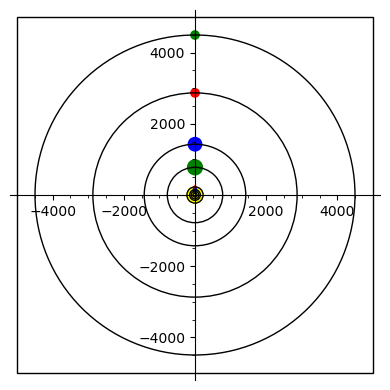

In [3]:
espace + Soleil + Mercure + Venus + Terre + Mars + Jupyter + Saturne + Uranus + Neptune

In [1]:
vitessePlanete = [172800,126000,104400,86400,3685,7697,4846] #en km/h 
rayon = [58*10e6,108*10e6,150*10e6,228*10e6,384*10e3,9.4*10e3,] #en km
angle = [0]*6
for i in range(6):
    angle[i] = 1000*vitessePlanete[i]/rayon[i]

In [2]:
def premierPlanete(t):
    Soleil = point2d((0,0), size = 1600000/1000, color ='yellow',axes = False)
    Mercure = point2d((58*cos(t*angle[0]-pi/2),58*sin(t*angle[0]-pi/2)),size = 4880/100,color = 'red') + circle((0,0),58, color = 'black')
    Venus = point2d((108*cos(t*angle[1]+pi/2),108*sin(t*angle[1]+pi/2)), size = 12100/100,color = 'orange') + circle((0,0),108, color = 'black')
    Terre = point2d((150*cos(t*angle[2]),150*sin(t*angle[2])), size = 12750/100,color = 'blue') + circle((0,0),150, color = 'black')
    Mars = point2d((228*cos(t*angle[3]-pi/4),228*sin(t*angle[3]-pi/4)), size = 6780/100,color = 'red') + circle((0,0),228, color = 'black')
    Lune = point2d((150*cos(t*angle[2])+ (38.4/2)*cos(t*angle[4]),150*sin(t*angle[2])+(38.4/2)*sin(t*angle[4])), size = (12750/100)/2,color = 'grey') + circle((150*cos(t*angle[2]),150*sin(t*angle[2])),38.4/2, color = 'black')
    #Phobos = point2d((228*cos(t*angle[3]-pi/4)+ (9.4)*cos(t*angle[5]),228*sin(t*angle[3]-pi/4)+(9.4)*sin(t*angle[5])), size = (12750/100)/2,color = 'grey') + circle((228*cos(t*angle[3]-pi/4),228*sin(t*angle[3]-pi/4)),9.4, color = 'black')
    return Soleil + Mercure + Venus + Terre + Mars + Lune

Animation with 100 frames
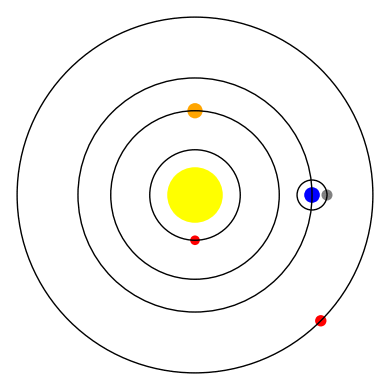

In [3]:
anim = [premierPlanete(n) for n in range(100)]
animate(anim).show()

In [43]:
import numpy as np
import pandas as pd

names = ["Mercure","Vénus","Terre","Mars","Jupyter","Saturne","Uranus","Neptune"]
planete = np.zeros((8,3))
planete[0] = np.array([1728*10e2,58*10e6,0])
planete[1] = np.array([1260*10e2,108*10e6,0])
planete[2] = np.array([1044*10e2,150*10e6,0])
planete[3] = np.array([864*10e2,228*10e6,0])
planete[4] = np.array([468*10e2,778*10e6,0])
planete[5] = np.array([360*10e2,1427*10e6,0])
planete[6] = np.array([252*10e2,2870*10e6,0])
planete[7] = np.array([180*10e2,4497*10e6,0])

for i in range(8):
    planete[i,2] = 1000*planete[i,0]/planete[i,1]

espace=pd.DataFrame(planete,index=names,columns=['Vitesse (km/h)','Rayon (km)','Angle de départ (radian)'])

espace.style.format({"Vitesse (km/h)":"{:.3e}","Rayon (km)":"{:.3e}"})

,Vitesse (km/h),Rayon (km),Angle de départ (radian)
Mercure,1.728e+06,5.800e+08,2.979310
Vénus,1.260e+06,1.080e+09,1.166667
Terre,1.044e+06,1.500e+09,0.696000
Mars,8.640e+05,2.280e+09,0.378947
Jupyter,4.680e+05,7.780e+09,0.060154
Saturne,3.600e+05,1.427e+10,0.025228
Uranus,2.520e+05,2.870e+10,0.008780
Neptune,1.800e+05,4.497e+10,0.004003


In [44]:
namesL = ["Lune","Phobos","Deimos"]

lunes = np.zeros((3,4))
lunes[0] = np.array([2,3685,100*384*10e3,0])
lunes[1] = np.array([3,7697,9.4*10e3,0])
lunes[2] = np.array([3,4846,23*10e3,0])

for i in range(3):
    lunes[i,3] = 1000*lunes[i,0]/lunes[i,1]

espaceL=pd.DataFrame(lunes,index=namesL,columns=['Indice Planète','Vitesse (km/h)','Rayon (km)','Angle de départ (radian)'])

espaceL.style.format({"Vitesse (km/h)":"{:.3e}","Rayon (km)":"{:.3e}"})

,Indice Planète,Vitesse (km/h),Rayon (km),Angle de départ (radian)
Lune,2.000000,3.685e+03,3.840e+08,0.542741
Phobos,3.000000,7.697e+03,9.400e+04,0.389762
Deimos,3.000000,4.846e+03,2.300e+05,0.619067


In [45]:
def position(t,p,col,i = 0):
    return point2d((p[1]*cos(t*p[2]+i),p[1]*sin(t*p[2]+i)),size = 50,color = col)

In [46]:
def syst():
    s = point2d((0,0), size = 1000, color ='yellow', axes = False)
    for i in planete:
        s += circle((0,0),i[1], color = 'black')
    return s

In [47]:
def syst_reduit():
    s = point2d((0,0), size = 1000, color ='yellow',axes = False)
    for i in range(4):
        s += circle((0,0),planete[i][1], color = 'black')
    return s

In [51]:
def positionLune(t,l,i):
    p = planete[int(l[0])]
    xT = p[1]*cos(t*p[2] + i)
    yT = p[1]*sin(t*p[2] + i)
    xL = l[2]*cos(t*l[3]) 
    yL = l[2]*sin(t*l[3])
    x = xT + xL
    y = yT + yL
    return point2d((x,y),size = 10,color = "grey")

In [49]:
def init_syst(t):
    S = position(t,planete[0],"red",-pi/2)
    S += position(t,planete[1],"orange",-pi/2)
    S += position(t,planete[2],"blue",pi/2)
    S += position(t,planete[3],"red")
    S += positionLune(t,lunes[0],pi/2)
    S += circle((planete[2,1]*cos(t*planete[2,2]),planete[2,1]*sin(t*planete[2,2])),500,color="black")
    return S

In [41]:
xT = 150*cos(t*angle[2])
yT = 150*sin(t*angle[2])
xL =  (38.4/2)*cos(t*angle[4])
yL =  (38.4/2)*sin(t*angle[4])

x = xT + xL
y = yT + yL

Lune = point2d((x,y), size = tailleL, color = 'grey') + circle((xT,yT), distTL, color = 'black')

NameError: name 't' is not defined

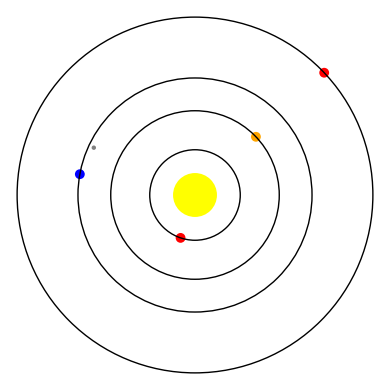

In [54]:
 syst_reduit() + init_syst(2)

Animation with 100 frames
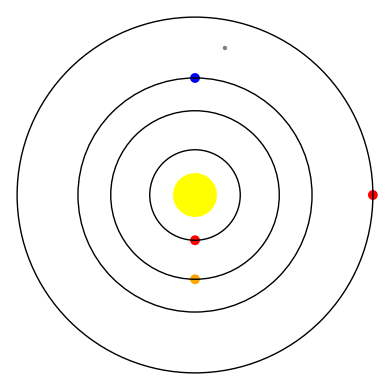

In [238]:
anim = [syst_reduit() + init_syst(n/10) for n in range(100)]
animate(anim).show()